In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data_income=pd.read_csv('Downloads/income.csv')
data=data_income.copy()
print(data.info())#gives data type of each variable
print('Data columns with null values:\n',data.isnull().sum())#Gives the sum of missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 2.1+ MB
None
Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [3]:
data.describe()#to get descriptive statistics of data

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [4]:
data.describe(include="O")#Description of categorical variables(O represents object) 


,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


Frequency of each category

In [5]:
print(data['JobType'].value_counts())
data['occupation'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64


 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

Checking the unique classes

In [6]:
print(np.unique(data['JobType']))
print(np.unique(data['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [7]:
data=pd.read_csv('Downloads/income.csv',na_values=[" ?"])#" ?" will be considered as Nan values

In [8]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [9]:
missing=data[data.isnull().any(axis=1)]#axis=1 considers atleast one column is missing
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [10]:
data2=data.dropna(axis=0)# Drop allrows where there are missing values
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [11]:
correlation=data2.corr() # pairwise correlation among the variables
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [12]:
gender=pd.crosstab(index=data2["gender"],columns='count',normalize=True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [13]:
gender_salstat=pd.crosstab(index=data2['gender'],columns=data2['SalStat'],margins=True,normalize='index') # gender vs salstat status
gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


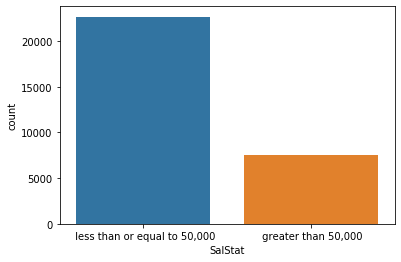

In [14]:
sns.countplot(data2['SalStat']) # frequency distribution of SalStat 

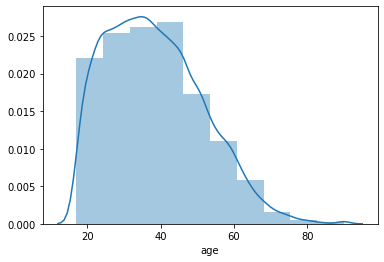

In [15]:
sns.distplot(data2['age'],bins=10,kde=True) # Histogram of Age variable

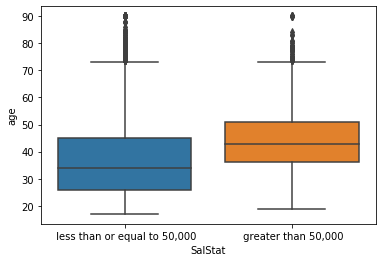

In [16]:
sns.boxplot('SalStat','age',data=data2) # Boxplot of age vs salstat

# Logistic Regression

In [17]:
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1}) # Re-indexing salstat values to 0 and 1
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


One hot encoding

In [18]:
new_data=pd.get_dummies(data2,drop_first=True) 

In [19]:
columns_list=list(new_data.columns)
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [20]:
features=list(set(columns_list)-set(['SalStat']))
features

['EdType_ 7th-8th',
 'JobType_ Local-gov',
 'occupation_ Handlers-cleaners',
 'race_ White',
 'JobType_ Private',
 'maritalstatus_ Widowed',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'maritalstatus_ Married-civ-spouse',
 'occupation_ Transport-moving',
 'occupation_ Tech-support',
 'occupation_ Priv-house-serv',
 'race_ Other',
 'nativecountry_ Dominican-Republic',
 'EdType_ Some-college',
 'nativecountry_ Thailand',
 'nativecountry_ Columbia',
 'JobType_ Self-emp-inc',
 'EdType_ Assoc-acdm',
 'relationship_ Other-relative',
 'JobType_ Without-pay',
 'relationship_ Own-child',
 'nativecountry_ Holand-Netherlands',
 'nativecountry_ Portugal',
 'hoursperweek',
 'nativecountry_ France',
 'nativecountry_ Italy',
 'nativecountry_ India',
 'nativecountry_ Scotland',
 'nativecountry_ Peru',
 'EdType_ 12th',
 'nativecountry_ Canada',
 'age',
 'nativecountry_ Greece',
 'race_ Black',
 'nativecountry_ United-States',
 'occupation_ Protective-serv',
 'nativecountry_ Ecuador',
 'nativecountry

In [21]:
y=new_data['SalStat'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
x=new_data[features].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
LR=LogisticRegression()

In [25]:
LR.fit(train_x,train_y)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
LR.coef_

array([[-1.26346886e+00, -7.47480297e-01, -9.16805066e-01,
        -5.11622435e-01, -5.06204905e-01, -1.40729061e-01,
        -6.38372472e-02,  7.86923340e-01, -3.42204351e-01,
         6.63824989e-01, -2.15899918e-01, -5.14904849e-01,
        -1.75042662e-01, -9.50027192e-02, -2.78158886e-02,
        -1.64657680e-01, -3.77459589e-01, -7.44023644e-02,
        -8.85783002e-01, -6.22499105e-02, -1.63030283e+00,
        -3.10778481e-03, -9.69088511e-02,  2.67779073e-02,
         2.51984065e-02,  6.41095279e-02, -2.53442863e-01,
        -3.94325603e-02, -7.89677589e-02, -4.00606367e-01,
         6.53252164e-02,  2.27163616e-02, -9.31704081e-02,
        -6.60710312e-01, -4.78538153e-02,  4.23172252e-01,
        -5.47542550e-02, -2.08793747e-02,  1.43558970e-02,
        -2.25680109e-01, -8.57356197e-01,  6.76552731e-01,
        -1.75413784e-02, -4.75406764e-02, -2.06305481e-01,
        -2.69028680e-01, -2.32180271e-02, -1.71536463e-01,
        -4.02334315e-01,  1.21658486e+00, -1.19346490e-0

In [27]:
LR.intercept_

array([-3.03625798])

# Prediction from test data

In [28]:
prediction=LR.predict(test_x)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
cm=confusion_matrix(test_y,prediction)
cm

array([[6332,  491],
       [ 934, 1292]], dtype=int64)

Calculating the accuracy

In [30]:
accuracy=accuracy_score(test_y,prediction)
accuracy
round(accuracy,4)

0.8425

In [31]:
print("misclassified samples: %d" %(test_y!=prediction).sum())

misclassified samples: 1425


# Random Forest Classifier

In [32]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [51]:
RF=RandomForestClassifier(n_estimators=30,random_state=2)

In [52]:
clf=RF.fit(train_x,train_y)

In [53]:
pred=RF.predict(test_x)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
acc=accuracy_score(test_y,pred)
acc
print("Accuracy is:",round(acc,4))

Accuracy is: 0.841
